## SKLearn库实例

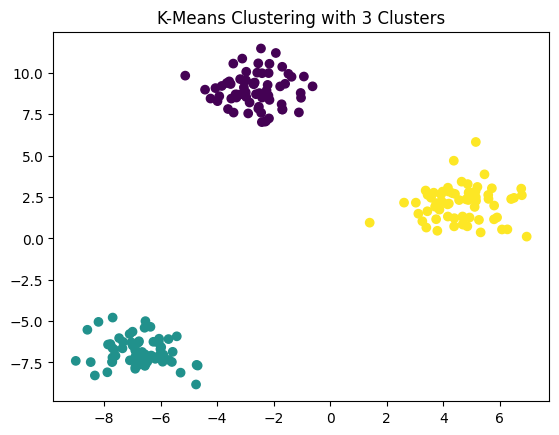

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=200, centers=3, random_state=42)

# Create and fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Predict cluster labels
labels = kmeans.predict(X)

# Visualize result
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title("K-Means Clustering with 3 Clusters")
plt.show()

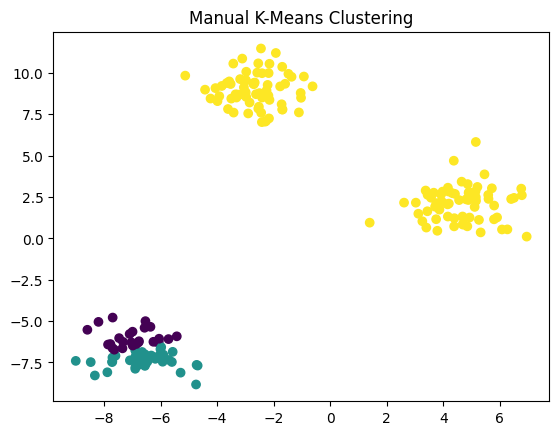

In [2]:
def k_means_manual(X, n_clusters=3, max_iter=100, tol=1e-4):
    """_summary_

    Args:
        X (_type_): _description_ 数据集
        n_clusters (int, optional): _description_. Defaults to 3. 聚类数
        max_iter (int, optional): _description_. Defaults to 100. 最大迭代次数
        tol (_type_, optional): _description_. Defaults to 1e-4. 质心变化阈值

    Returns:
        _type_: _description_ 返回聚类标签和质心
    """
    # 随机初始化质心
    rng = np.random.RandomState(42)
    centroids = X[rng.choice(len(X), n_clusters, replace=False)]

    for _ in range(max_iter):
        # 计算每个点到质心的距离并分配簇
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels_manual = distances.argmin(axis=0)

        # 更新质心
        new_centroids = np.array(
            [X[labels_manual == i].mean(axis=0) for i in range(n_clusters)])

        # 如果质心变化小于阈值，停止迭代
        shift = np.sqrt(((centroids - new_centroids)**2).sum())
        centroids = new_centroids
        if shift < tol:
            break

    return labels_manual, centroids


labels_manual, centroids_manual = k_means_manual(X, n_clusters=3)
plt.scatter(X[:, 0], X[:, 1], c=labels_manual, cmap='viridis', marker='o')
plt.title("Manual K-Means Clustering")
plt.show()